In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import glob

# List of your .txt files
txt_files = [
    "/content/drive/MyDrive/TMSL_30_6_25/dataset/NORMAL/Normal_1_250HZ.txt",
    "/content/drive/MyDrive/TMSL_30_6_25/dataset/NORMAL/Normal_2_250HZ.txt",
    "/content/drive/MyDrive/TMSL_30_6_25/dataset/NORMAL/Normal_3_250HZ.txt",
    "/content/drive/MyDrive/TMSL_30_6_25/dataset/NORMAL/Normal_4_250HZ.txt",
    "/content/drive/MyDrive/TMSL_30_6_25/dataset/NORMAL/Normal_5_250HZ.txt",
]

# Empty list to collect all dataframes
all_data = []

# Loop through each file
for file in txt_files:
    # Read the tab-separated file with no header
    df = pd.read_csv(file, sep="\s+", header=None, names=["Time", "Signal"])

    # Add a new column for the label
    df["Label"] = "normal"

    # Append to list
    all_data.append(df)

# Concatenate all dataframes
final_df = pd.concat(all_data, ignore_index=True)

# Save to a CSV file
final_df.to_csv("/content/drive/MyDrive/TMSL_30_6_25/combined_normal_signals.csv", index=False)

print("CSV file 'combined_normal_signals.csv' created successfully.")

CSV file 'combined_normal_signals.csv' created successfully.


Labels present: ['normal']


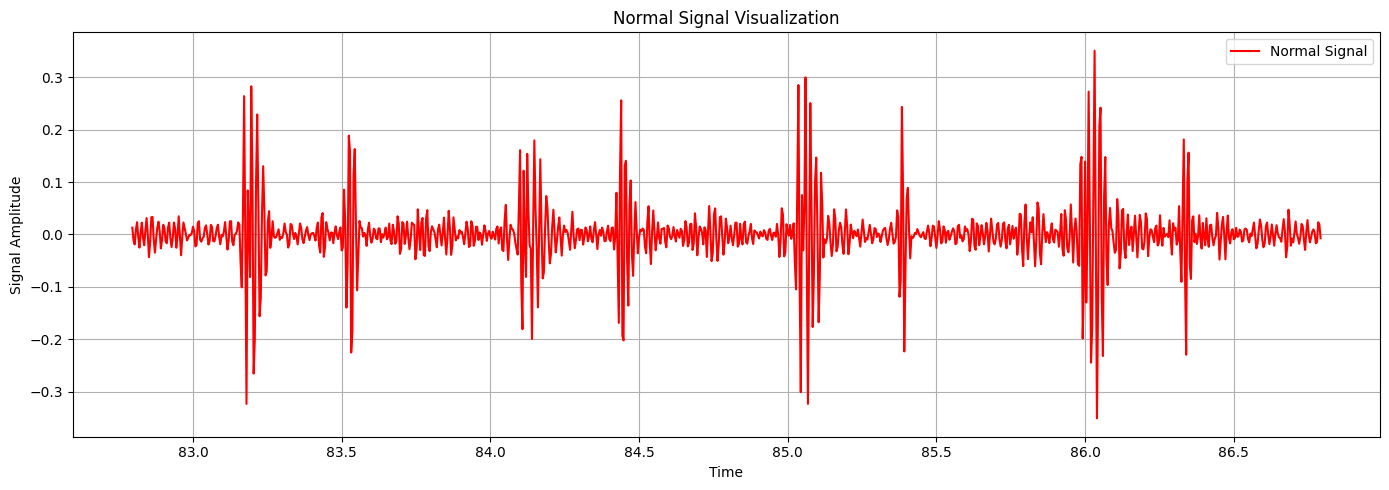

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/TMSL_30_6_25/combined_normal_signals.csv")

# Optional: Check if there are multiple labels
print("Labels present:", df["Label"].unique())

# Plot signal for a selected portion (e.g., first 1000 points)
plt.figure(figsize=(14, 5))
plt.plot(df["Time"][:1000], df["Signal"][:1000], label="Normal Signal", color="red")
plt.title("Normal Signal Visualization")
plt.xlabel("Time")
plt.ylabel("Signal Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import glob

# List of your .txt files
txt_files = [
    "/content/drive/MyDrive/TMSL_30_6_25/dataset/HOCM/31_HOCM_PCG_1_Raw.txt",
    "/content/drive/MyDrive/TMSL_30_6_25/dataset/HOCM/31_HOCM_PCG_2_Raw.txt",
    "/content/drive/MyDrive/TMSL_30_6_25/dataset/HOCM/31_HOCM_PCG_3_Raw.txt",
    "/content/drive/MyDrive/TMSL_30_6_25/dataset/HOCM/31_HOCM_PCG_RAW.txt",
    "/content/drive/MyDrive/TMSL_30_6_25/dataset/HOCM/37_HOCM_PCG_RAW.txt",

]

# Empty list to collect all dataframes
all_data = []

# Loop through each file
for file in txt_files:
    # Read the tab-separated file with no header
    df = pd.read_csv(file, sep="\s+", header=None, names=["Time", "Signal"])

    # Add a new column for the label
    df["Label"] = "HOCM"

    # Append to list
    all_data.append(df)

# Concatenate all dataframes
final_df = pd.concat(all_data, ignore_index=True)

# Save to a CSV file
final_df.to_csv("/content/drive/MyDrive/TMSL_30_6_25/combined_HOCM_signals.csv", index=False)

print("CSV file 'combined_HOCM_signals.csv' created successfully.")

CSV file 'combined_HOCM_signals.csv' created successfully.


Labels present: ['HOCM']


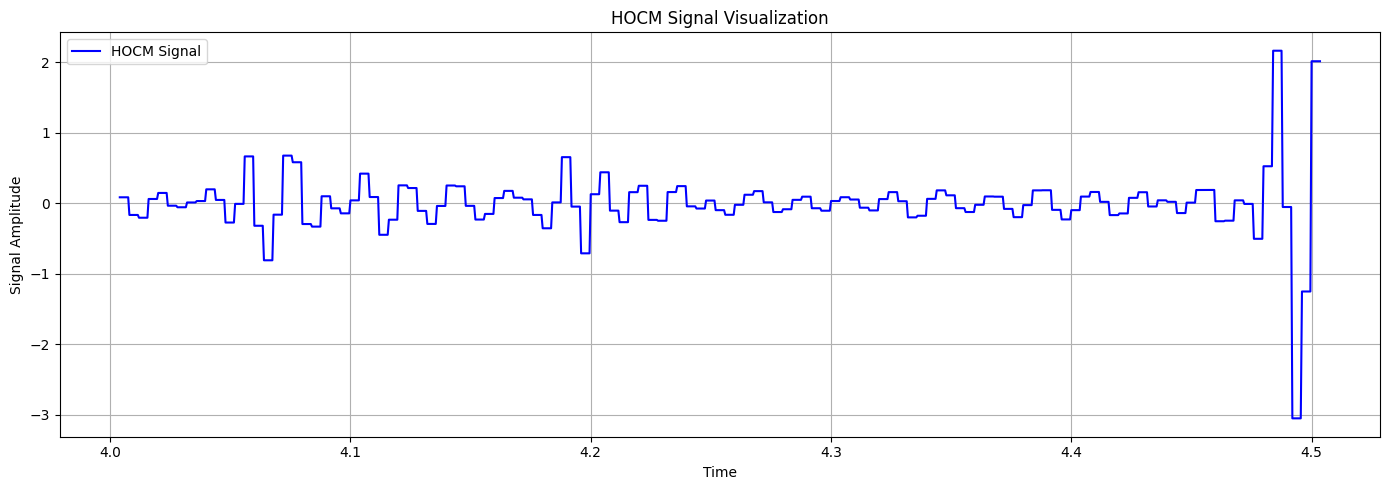

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/TMSL_30_6_25/combined_HOCM_signals.csv")

# Optional: Check if there are multiple labels
print("Labels present:", df["Label"].unique())

# Plot signal for a selected portion (e.g., first 1000 points)
plt.figure(figsize=(14, 5))
plt.plot(df["Time"][:1000], df["Signal"][:1000], label="HOCM Signal", color="blue")
plt.title("HOCM Signal Visualization")
plt.xlabel("Time")
plt.ylabel("Signal Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Segment 1: Duration ab = 0.20s, Delay ac = 0.08s, Amplitude cd = 0.39
Segment 2: Duration ab = 0.60s, Delay ac = 0.40s, Amplitude cd = -0.52
Segment 3: Duration ab = 0.20s, Delay ac = 0.10s, Amplitude cd = -0.42
Segment 4: Duration ab = 0.20s, Delay ac = 0.01s, Amplitude cd = 0.37
Segment 5: Duration ab = 0.20s, Delay ac = 0.12s, Amplitude cd = 0.44
Segment 6: Duration ab = 0.20s, Delay ac = 0.03s, Amplitude cd = 0.41
Segment 7: Duration ab = 0.20s, Delay ac = 0.11s, Amplitude cd = 0.22
Segment 8: Duration ab = 0.20s, Delay ac = 0.13s, Amplitude cd = 0.48
Segment 9: Duration ab = 0.20s, Delay ac = 0.20s, Amplitude cd = 0.15
Segment 10: Duration ab = 0.20s, Delay ac = 0.08s, Amplitude cd = -0.48
Segment 11: Duration ab = 0.20s, Delay ac = 0.00s, Amplitude cd = 0.42


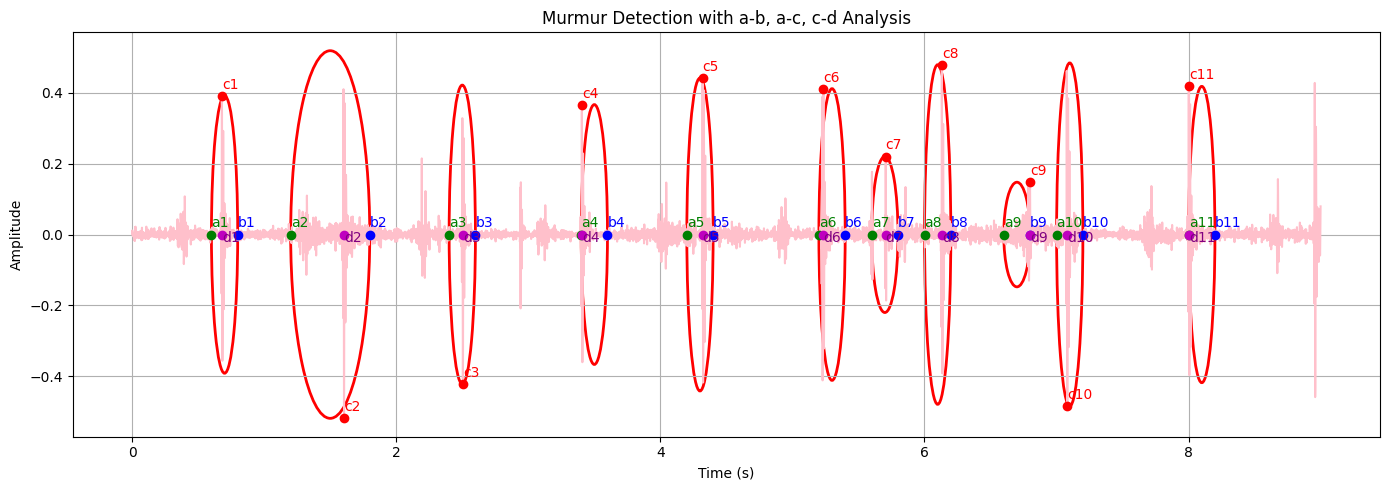

Saved: murmur_analysis_graph.jpg


In [29]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from matplotlib.patches import Ellipse
import os

# -----------------------------
# Configuration
# -----------------------------
FILE = "/content/drive/MyDrive/TMSL_30_6_25/murmur__201102052338.wav"
SR = 1000
WINDOW_SIZE = 0.2
THRESHOLD_RATIO = 0.5
OUTPUT_FOLDER = "/content/drive/MyDrive/TMSL_30_6_25/murmur_analysis1"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# -----------------------------
# Load Audio
# -----------------------------
# Load your PCG signal
'''
df = pd.read_csv("/content/drive/MyDrive/TMSL_30_6_25/combined_HOCM_signals.csv")
signal = df.iloc[:, 1].values  # Assuming the first column contains the signal
sr = 1000  # Adjust sample rate as needed
'''
signal, sr = librosa.load(FILE, sr=SR)
duration = len(signal) / sr
time = np.linspace(0, duration, len(signal))

# -----------------------------
# Calculate Energy
# -----------------------------
win_len = int(WINDOW_SIZE * SR)
energy = np.array([
    np.sum(signal[i:i + win_len] ** 2)
    for i in range(0, len(signal) - win_len, win_len)
])
threshold = THRESHOLD_RATIO * np.mean(energy)
#threshold=.5
murmur_indices = np.where(energy > threshold)[0]

# -----------------------------
# Group Segments
# -----------------------------
segments = []
if len(murmur_indices) > 0:
    start = murmur_indices[0]
    for i in range(1, len(murmur_indices)):
        if murmur_indices[i] != murmur_indices[i - 1] + 1:
            end = murmur_indices[i - 1]
            segments.append((start, end))
            start = murmur_indices[i]
    segments.append((start, murmur_indices[-1]))

# -----------------------------
# Analysis and Visualization
# -----------------------------
plt.figure(figsize=(14, 5))
plt.plot(time, signal, label="PCG Signal", color='pink')

for idx, (start_idx, end_idx) in enumerate(segments):
    start_sample = start_idx * win_len
    end_sample = (end_idx + 1) * win_len
    segment = signal[start_sample:end_sample]
    segment_time = time[start_sample:end_sample]

    # a = start_t, b = end_t (duration = b - a)
    start_t = time[start_sample]
    end_t = time[end_sample - 1]
    center_time = (start_t + end_t) / 2
    width = end_t - start_t

    # c = peak point (max amplitude), d = baseline (amplitude = cd)
    peak_index = np.argmax(np.abs(segment))
    peak_time = segment_time[peak_index]
    peak_amp = segment[peak_index]

    duration = end_t - start_t
    delay = peak_time - start_t
    amplitude = peak_amp

    # Mark ellipse
    ellipse = Ellipse((center_time, 0), width=width, height=2*abs(amplitude), edgecolor='red', facecolor='none', linewidth=2)
    plt.gca().add_patch(ellipse)

    # Annotate points a, b, c, d
    plt.plot(start_t, 0, 'go')  # point a
    plt.text(start_t, 0.02, f'a{idx+1}', color='green')
    plt.plot(end_t, 0, 'bo')    # point b
    plt.text(end_t, 0.02, f'b{idx+1}', color='blue')
    plt.plot(peak_time, peak_amp, 'ro')  # point c
    plt.text(peak_time, peak_amp + 0.02, f'c{idx+1}', color='red')
    plt.plot(peak_time, 0, 'mo')         # point d
    plt.text(peak_time, -0.02, f'd{idx+1}', color='purple')

    print(f"Segment {idx+1}: Duration ab = {duration:.2f}s, Delay ac = {delay:.2f}s, Amplitude cd = {amplitude:.2f}")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Murmur Detection with a-b, a-c, c-d Analysis")
plt.grid(True)
#plt.legend(["PCG Signal", "a (start)", "b (end)", "c (peak)", "d (baseline)"])
plt.tight_layout()
plt.savefig(f"{OUTPUT_FOLDER}/murmur_analysis_graph.jpg")
plt.show()
print("Saved: murmur_analysis_graph.jpg")

Segment 1: Duration ab = 0.20s, Delay ac = 0.08s, Amplitude cd = 0.39
Segment 2: Duration ab = 0.60s, Delay ac = 0.40s, Amplitude cd = -0.52
Segment 3: Duration ab = 0.60s, Delay ac = 0.50s, Amplitude cd = -0.42
Segment 4: Duration ab = 0.20s, Delay ac = 0.14s, Amplitude cd = -0.21
Segment 5: Duration ab = 0.20s, Delay ac = 0.01s, Amplitude cd = 0.37
Segment 6: Duration ab = 0.40s, Delay ac = 0.32s, Amplitude cd = 0.44
Segment 7: Duration ab = 0.20s, Delay ac = 0.15s, Amplitude cd = 0.10
Segment 8: Duration ab = 0.20s, Delay ac = 0.03s, Amplitude cd = 0.41
Segment 9: Duration ab = 0.60s, Delay ac = 0.53s, Amplitude cd = 0.48
Segment 10: Duration ab = 0.20s, Delay ac = 0.20s, Amplitude cd = 0.15
Segment 11: Duration ab = 0.20s, Delay ac = 0.08s, Amplitude cd = -0.48
Segment 12: Duration ab = 0.20s, Delay ac = 0.12s, Amplitude cd = 0.14
Segment 13: Duration ab = 0.20s, Delay ac = 0.00s, Amplitude cd = 0.42
Segment 14: Duration ab = 0.20s, Delay ac = 0.08s, Amplitude cd = 0.16


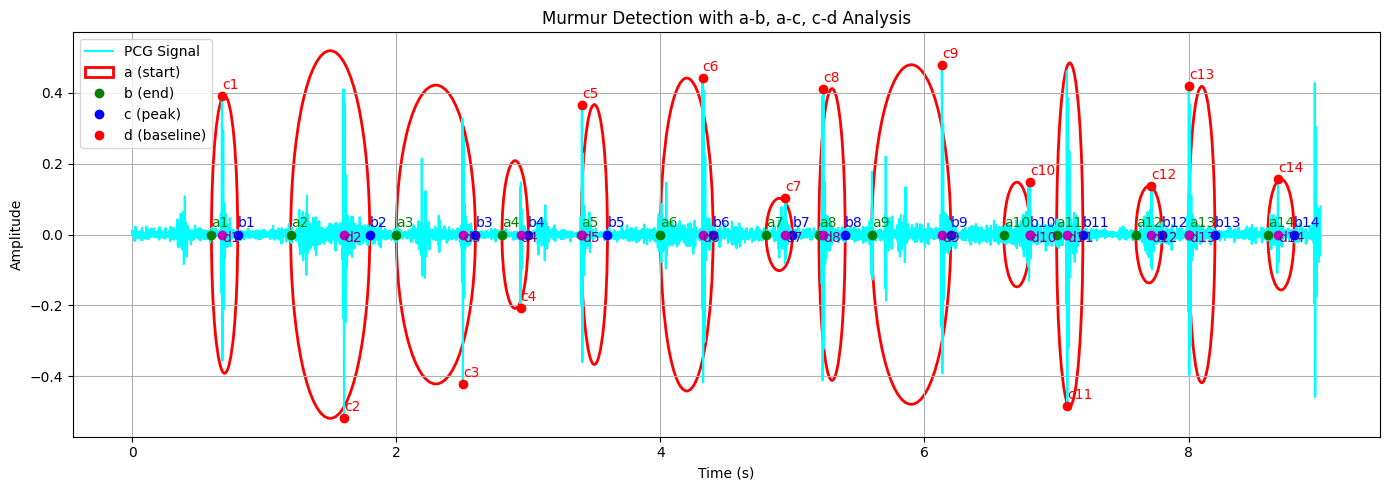

Saved: murmur_analysis_graph.jpg


In [24]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from matplotlib.patches import Ellipse
import os
import pandas as pd

# -----------------------------
# Configuration
# -----------------------------
FILE = "/content/drive/MyDrive/TMSL_30_6_25/murmur__201102052338.wav"
SR = 1000
WINDOW_SIZE = 0.2
THRESHOLD_RATIO = 0.5
OUTPUT_FOLDER = "/content/drive/MyDrive/TMSL_30_6_25/murmur_analysis2"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# -----------------------------
# Load Audio
# -----------------------------
# Load your PCG signal
'''
df = pd.read_csv("/content/drive/MyDrive/TMSL_30_6_25/combined_AORTICSCLEROCIS_signals.csv")
signal = df.iloc[:, 1].values  # Assuming the first column contains the signal
sr = 1000  # Adjust sample rate as needed
'''
signal, sr = librosa.load(FILE, sr=SR)
duration = len(signal) / sr
time = np.linspace(0, duration, len(signal))

# -----------------------------
# Calculate Energy
# -----------------------------
win_len = int(WINDOW_SIZE * SR)
energy = np.array([
    np.sum(signal[i:i + win_len] ** 2)
    for i in range(0, len(signal) - win_len, win_len)
])
#threshold = THRESHOLD_RATIO * np.mean(energy)
threshold=.1
murmur_indices = np.where(energy > threshold)[0]

# -----------------------------
# Group Segments
# -----------------------------
segments = []
if len(murmur_indices) > 0:
    start = murmur_indices[0]
    for i in range(1, len(murmur_indices)):
        if murmur_indices[i] != murmur_indices[i - 1] + 1:
            end = murmur_indices[i - 1]
            segments.append((start, end))
            start = murmur_indices[i]
    segments.append((start, murmur_indices[-1]))

# -----------------------------
# Analysis and Visualization
# -----------------------------
plt.figure(figsize=(14, 5))
plt.plot(time, signal, label="PCG Signal", color='cyan')

for idx, (start_idx, end_idx) in enumerate(segments):
    start_sample = start_idx * win_len
    end_sample = (end_idx + 1) * win_len
    segment = signal[start_sample:end_sample]
    segment_time = time[start_sample:end_sample]

    # a = start_t, b = end_t (duration = b - a)
    start_t = time[start_sample]
    end_t = time[end_sample - 1]
    center_time = (start_t + end_t) / 2
    width = end_t - start_t

    # c = peak point (max amplitude), d = baseline (amplitude = cd)
    peak_index = np.argmax(np.abs(segment))
    peak_time = segment_time[peak_index]
    peak_amp = segment[peak_index]

    duration = end_t - start_t
    delay = peak_time - start_t
    amplitude = peak_amp

    # Mark ellipse
    ellipse = Ellipse((center_time, 0), width=width, height=2*abs(amplitude), edgecolor='red', facecolor='none', linewidth=2)
    plt.gca().add_patch(ellipse)

    # Annotate points a, b, c, d
    plt.plot(start_t, 0, 'go')  # point a
    plt.text(start_t, 0.02, f'a{idx+1}', color='green')
    plt.plot(end_t, 0, 'bo')    # point b
    plt.text(end_t, 0.02, f'b{idx+1}', color='blue')
    plt.plot(peak_time, peak_amp, 'ro')  # point c
    plt.text(peak_time, peak_amp + 0.02, f'c{idx+1}', color='red')
    plt.plot(peak_time, 0, 'mo')         # point d
    plt.text(peak_time, -0.02, f'd{idx+1}', color='purple')

    print(f"Segment {idx+1}: Duration ab = {duration:.2f}s, Delay ac = {delay:.2f}s, Amplitude cd = {amplitude:.2f}")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Murmur Detection with a-b, a-c, c-d Analysis")
plt.grid(True)
plt.legend(["PCG Signal", "a (start)", "b (end)", "c (peak)", "d (baseline)"])
plt.tight_layout()
plt.savefig(f"{OUTPUT_FOLDER}/murmur_analysis_graph.jpg")
plt.show()
print("Saved: murmur_analysis_graph.jpg")

**3rd Test**

Saved /content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3/murmur_segment_1.jpg | Duration: 0.20s | Peak Delay: 0.08s | Amplitude: 0.39
Saved /content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3/murmur_segment_2.jpg | Duration: 0.40s | Peak Delay: 0.20s | Amplitude: 0.52
Saved /content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3/murmur_segment_3.jpg | Duration: 0.20s | Peak Delay: 0.10s | Amplitude: 0.42
Saved /content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3/murmur_segment_4.jpg | Duration: 0.20s | Peak Delay: 0.01s | Amplitude: 0.37
Saved /content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3/murmur_segment_5.jpg | Duration: 0.20s | Peak Delay: 0.12s | Amplitude: 0.44
Saved /content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3/murmur_segment_6.jpg | Duration: 0.20s | Peak Delay: 0.03s | Amplitude: 0.41
Saved /content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3/murmur_segment_7.jpg | Duration: 0.20s | Peak Delay: 0.11s | Amplitude: 0.22
Saved /content/drive/MyDrive/TMSL_30_6_25/murmur

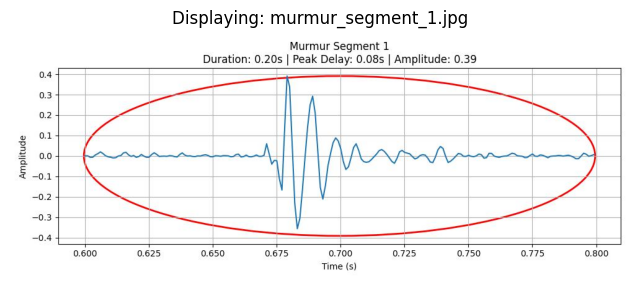

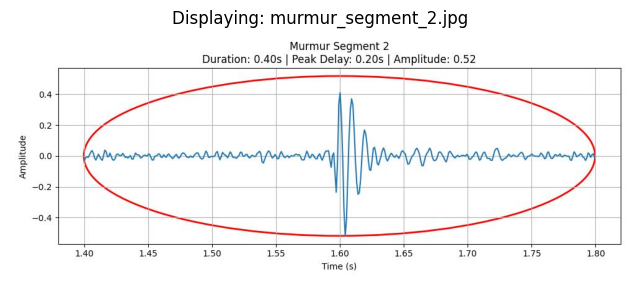

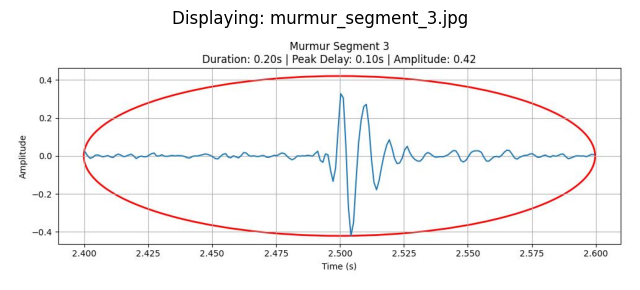

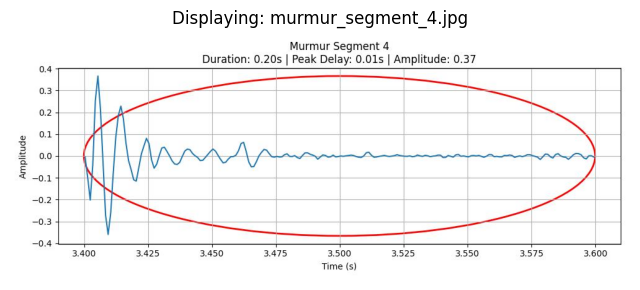

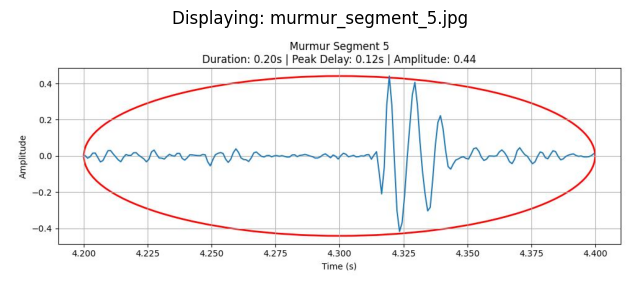

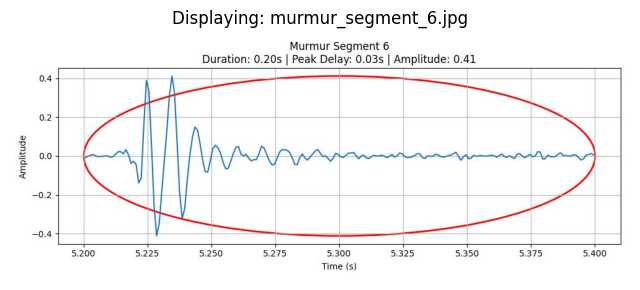

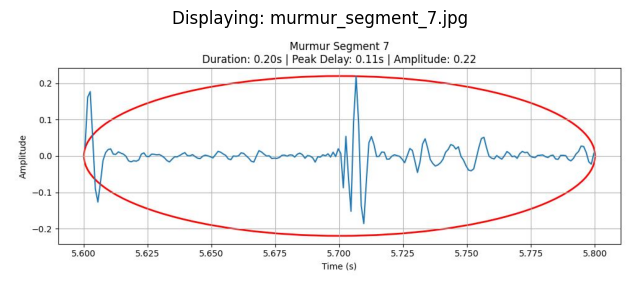

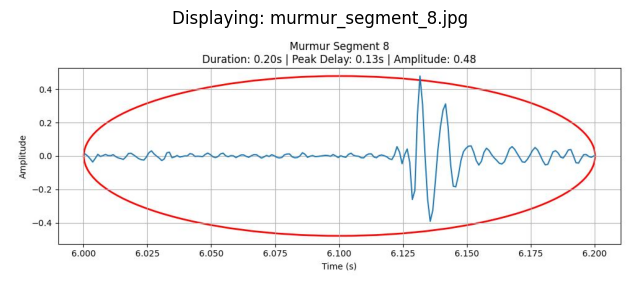

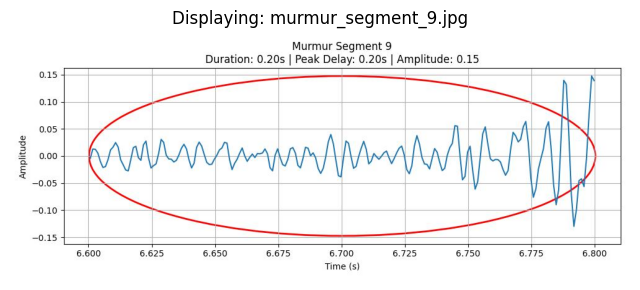

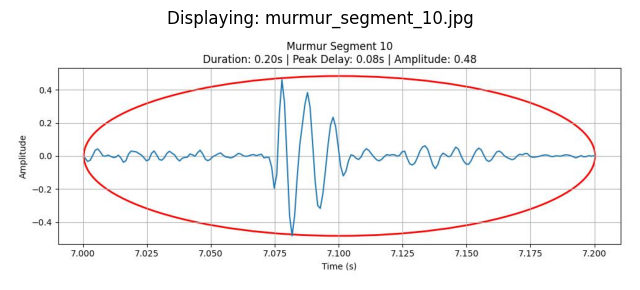

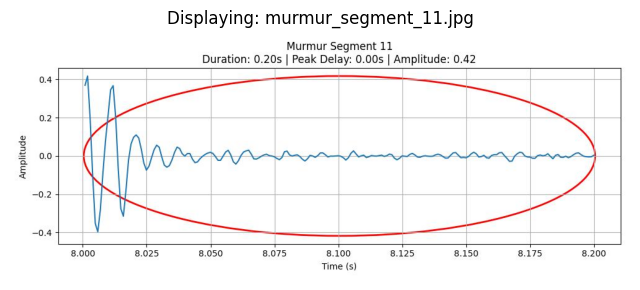

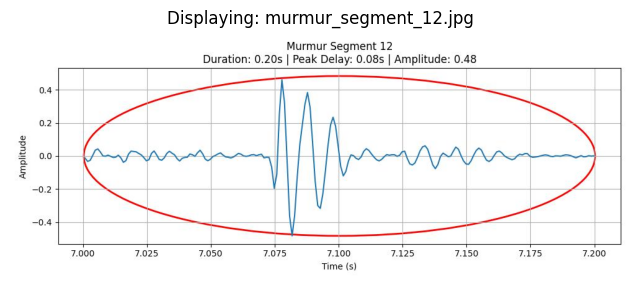

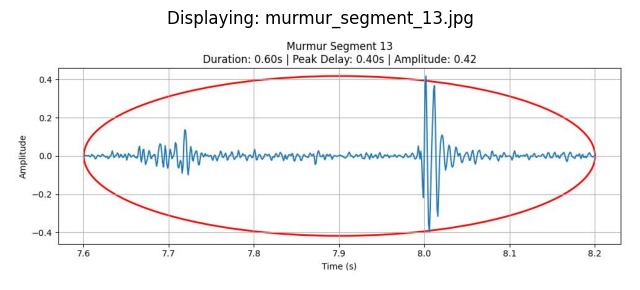

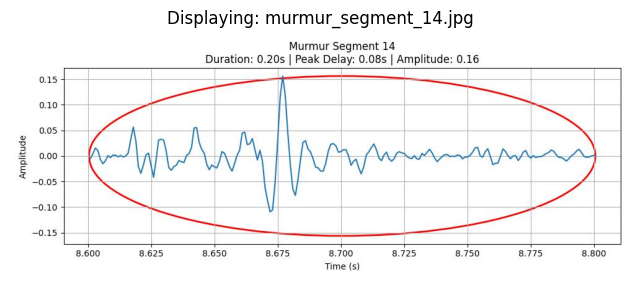

In [23]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import os
import soundfile as sf

# -----------------------------
# Load Signal
# -----------------------------
'''
df = pd.read_csv("/content/drive/MyDrive/TMSL_30_6_25/combined_AORTICSCLEROCIS_signals.csv")
signal = df.iloc[:, 1].values  # Assuming the first column contains the signal
sr = 1000  # Adjust sample rate as needed
'''
FILE = "/content/drive/MyDrive/TMSL_30_6_25/murmur__201102052338.wav"
SR = 1000
signal, sr = librosa.load(FILE, sr=SR)
time = np.linspace(0, len(signal) / sr, len(signal))

# -----------------------------
# Parameters
# -----------------------------
WINDOW_SEC = 0.2
WIN_LEN = int(SR * WINDOW_SEC)
energy = np.array([np.sum(signal[i:i+WIN_LEN]**2) for i in range(0, len(signal)-WIN_LEN, WIN_LEN)])
#threshold = 0.2 * np.mean(energy)
threshold=.2
murmur_idx = np.where(energy > threshold)[0]

# -----------------------------
# Detect Murmur Segments
# -----------------------------
segments = []
if len(murmur_idx) > 0:
    start = murmur_idx[0]
    for i in range(1, len(murmur_idx)):
        if murmur_idx[i] != murmur_idx[i - 1] + 1:
            end = murmur_idx[i - 1]
            segments.append((start, end))
            start = murmur_idx[i]
    segments.append((start, murmur_idx[-1]))

# -----------------------------
# Analyze and Visualize Segments
# -----------------------------
output_folder = "/content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3"
os.makedirs(output_folder, exist_ok=True)

for idx, (start_idx, end_idx) in enumerate(segments):
    start_sample = start_idx * WIN_LEN
    end_sample = (end_idx + 1) * WIN_LEN
    segment = signal[start_sample:end_sample]
    segment_time = time[start_sample:end_sample]

    # Duration AB
    duration_sec = (end_sample - start_sample) / SR

    # Peak delay AC
    peak_pos = np.argmax(np.abs(segment))
    peak_delay = peak_pos / SR

    # Amplitude CD
    amplitude = np.max(np.abs(segment))

    # Plot with Ellipse
    plt.figure(figsize=(10, 4))
    plt.plot(segment_time, segment, label=f"Murmur Segment {idx+1}")
    plt.title(f"Murmur Segment {idx+1}\nDuration: {duration_sec:.2f}s | Peak Delay: {peak_delay:.2f}s | Amplitude: {amplitude:.2f}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Red oval highlighting murmur
    center_time = (segment_time[0] + segment_time[-1]) / 2
    ellipse = Ellipse((center_time, 0), width=duration_sec, height=2 * amplitude,
                      edgecolor='red', facecolor='none', linewidth=2)
    plt.gca().add_patch(ellipse)

    # Save image
    img_path = f"{output_folder}/murmur_segment_{idx+1}.jpg"
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()

    print(f"Saved {img_path} | Duration: {duration_sec:.2f}s | Peak Delay: {peak_delay:.2f}s | Amplitude: {amplitude:.2f}")

    import os
import matplotlib.pyplot as plt
import cv2

# Set the path to your image folder
FOLDER_PATH = "/content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3/"  # or "images/", or wherever your images are saved

# Supported image extensions
IMAGE_EXTENSIONS = [".png", ".jpg", ".jpeg", ".bmp"]

# Get all image file names in folder
image_files = [f for f in os.listdir(FOLDER_PATH) if os.path.splitext(f)[1].lower() in IMAGE_EXTENSIONS]

# Display each image
for img_file in image_files:
    img_path = os.path.join(FOLDER_PATH, img_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct colors

    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(f"Displaying: {img_file}")
    plt.axis("off")
    plt.show()

Segment 1: Duration ab = 0.40s, Delay ac = 0.27s, Amplitude cd = -0.10
Segment 2: Duration ab = 0.40s, Delay ac = 0.34s, Amplitude cd = -0.12
Segment 3: Duration ab = 0.20s, Delay ac = 0.10s, Amplitude cd = 0.06
Segment 4: Duration ab = 0.20s, Delay ac = 0.03s, Amplitude cd = 0.12
Segment 5: Duration ab = 0.60s, Delay ac = 0.50s, Amplitude cd = -0.11
Segment 6: Duration ab = 0.40s, Delay ac = 0.11s, Amplitude cd = -0.11
Segment 7: Duration ab = 0.20s, Delay ac = 0.12s, Amplitude cd = 0.09
Segment 8: Duration ab = 0.20s, Delay ac = 0.04s, Amplitude cd = -0.12
Segment 9: Duration ab = 0.60s, Delay ac = 0.50s, Amplitude cd = 0.10
Segment 10: Duration ab = 0.40s, Delay ac = 0.36s, Amplitude cd = 0.10
Segment 11: Duration ab = 0.20s, Delay ac = 0.14s, Amplitude cd = -0.09
Segment 12: Duration ab = 0.20s, Delay ac = 0.01s, Amplitude cd = -0.14
Segment 13: Duration ab = 0.20s, Delay ac = 0.16s, Amplitude cd = 0.07
Segment 14: Duration ab = 0.20s, Delay ac = 0.08s, Amplitude cd = -0.11
Segment

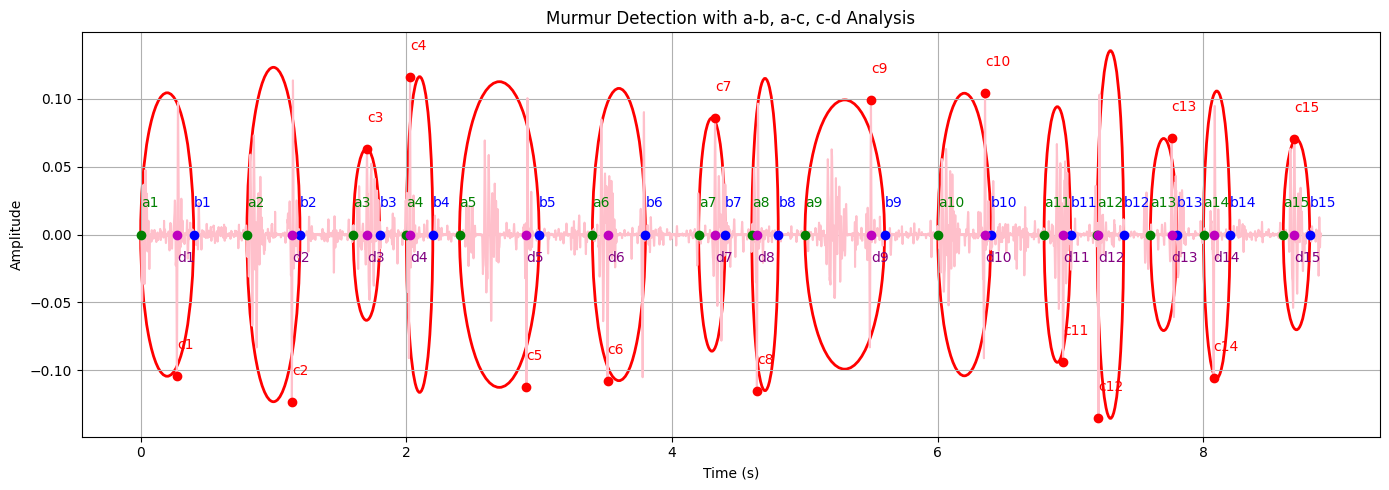

Saved: murmur_analysis_graph.jpg


In [31]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from matplotlib.patches import Ellipse
import os

# -----------------------------
# Configuration
# -----------------------------
FILE = "/content/drive/MyDrive/TMSL_30_6_25/input/set_a/murmur__201101051104.wav"
SR = 1000
WINDOW_SIZE = 0.2
THRESHOLD_RATIO = 0.5
OUTPUT_FOLDER = "/content/drive/MyDrive/TMSL_30_6_25/murmur_analysis1"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# -----------------------------
# Load Audio
# -----------------------------
# Load your PCG signal
'''
df = pd.read_csv("/content/drive/MyDrive/TMSL_30_6_25/combined_HOCM_signals.csv")
signal = df.iloc[:, 1].values  # Assuming the first column contains the signal
sr = 1000  # Adjust sample rate as needed
'''
signal, sr = librosa.load(FILE, sr=SR)
duration = len(signal) / sr
time = np.linspace(0, duration, len(signal))

# -----------------------------
# Calculate Energy
# -----------------------------
win_len = int(WINDOW_SIZE * SR)
energy = np.array([
    np.sum(signal[i:i + win_len] ** 2)
    for i in range(0, len(signal) - win_len, win_len)
])
#threshold = THRESHOLD_RATIO * np.mean(energy)
threshold=.03
murmur_indices = np.where(energy > threshold)[0]

# -----------------------------
# Group Segments
# -----------------------------
segments = []
if len(murmur_indices) > 0:
    start = murmur_indices[0]
    for i in range(1, len(murmur_indices)):
        if murmur_indices[i] != murmur_indices[i - 1] + 1:
            end = murmur_indices[i - 1]
            segments.append((start, end))
            start = murmur_indices[i]
    segments.append((start, murmur_indices[-1]))

# -----------------------------
# Analysis and Visualization
# -----------------------------
plt.figure(figsize=(14, 5))
plt.plot(time, signal, label="PCG Signal", color='pink')

for idx, (start_idx, end_idx) in enumerate(segments):
    start_sample = start_idx * win_len
    end_sample = (end_idx + 1) * win_len
    segment = signal[start_sample:end_sample]
    segment_time = time[start_sample:end_sample]

    # a = start_t, b = end_t (duration = b - a)
    start_t = time[start_sample]
    end_t = time[end_sample - 1]
    center_time = (start_t + end_t) / 2
    width = end_t - start_t

    # c = peak point (max amplitude), d = baseline (amplitude = cd)
    peak_index = np.argmax(np.abs(segment))
    peak_time = segment_time[peak_index]
    peak_amp = segment[peak_index]

    duration = end_t - start_t
    delay = peak_time - start_t
    amplitude = peak_amp

    # Mark ellipse
    ellipse = Ellipse((center_time, 0), width=width, height=2*abs(amplitude), edgecolor='red', facecolor='none', linewidth=2)
    plt.gca().add_patch(ellipse)

    # Annotate points a, b, c, d
    plt.plot(start_t, 0, 'go')  # point a
    plt.text(start_t, 0.02, f'a{idx+1}', color='green')
    plt.plot(end_t, 0, 'bo')    # point b
    plt.text(end_t, 0.02, f'b{idx+1}', color='blue')
    plt.plot(peak_time, peak_amp, 'ro')  # point c
    plt.text(peak_time, peak_amp + 0.02, f'c{idx+1}', color='red')
    plt.plot(peak_time, 0, 'mo')         # point d
    plt.text(peak_time, -0.02, f'd{idx+1}', color='purple')

    print(f"Segment {idx+1}: Duration ab = {duration:.2f}s, Delay ac = {delay:.2f}s, Amplitude cd = {amplitude:.2f}")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Murmur Detection with a-b, a-c, c-d Analysis")
plt.grid(True)
#plt.legend(["PCG Signal", "a (start)", "b (end)", "c (peak)", "d (baseline)"])
plt.tight_layout()
plt.savefig(f"{OUTPUT_FOLDER}/murmur_analysis_graph.jpg")
plt.show()
print("Saved: murmur_analysis_graph.jpg")

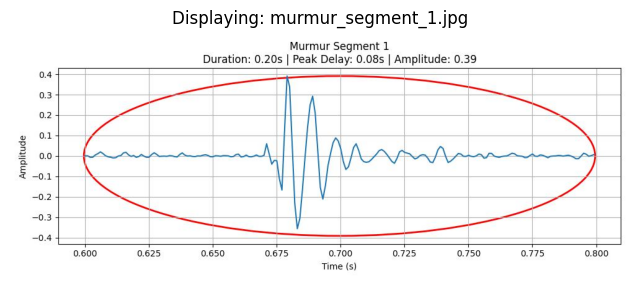

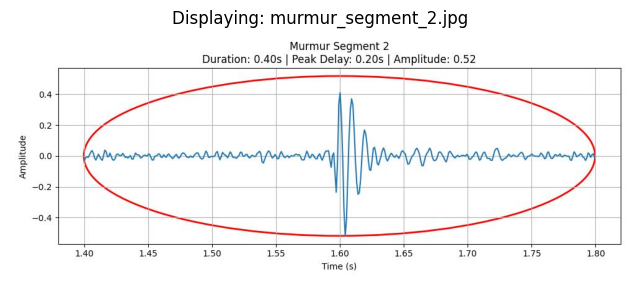

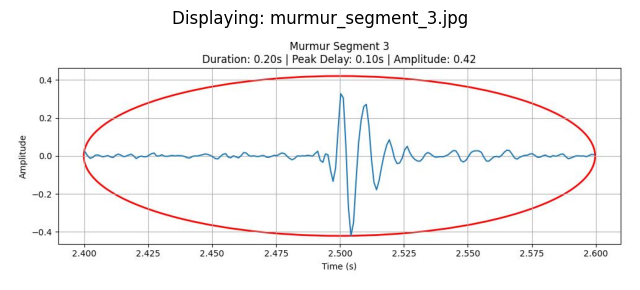

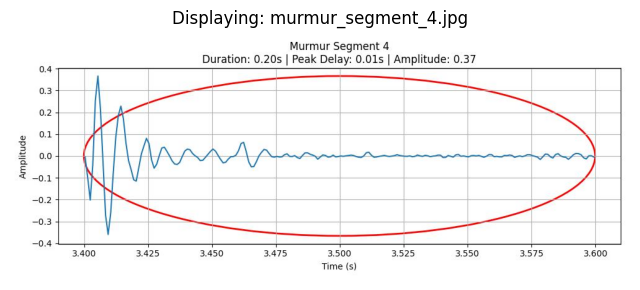

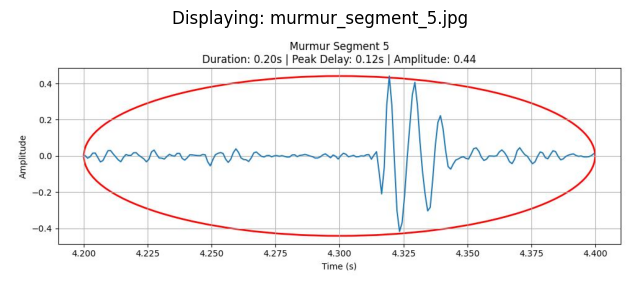

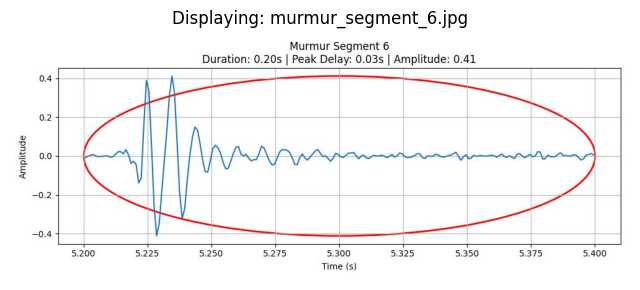

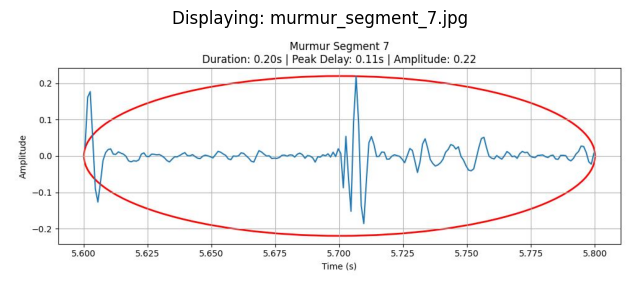

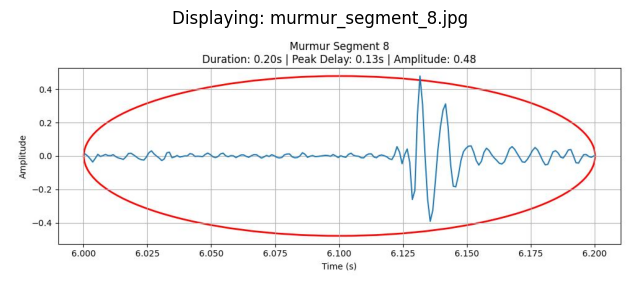

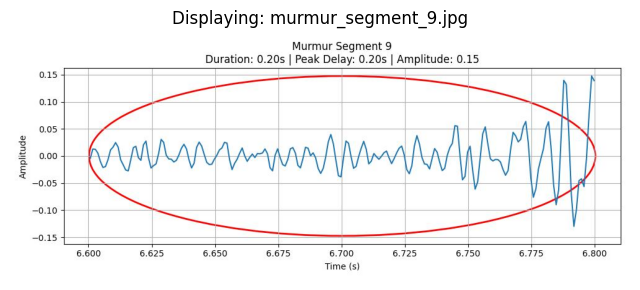

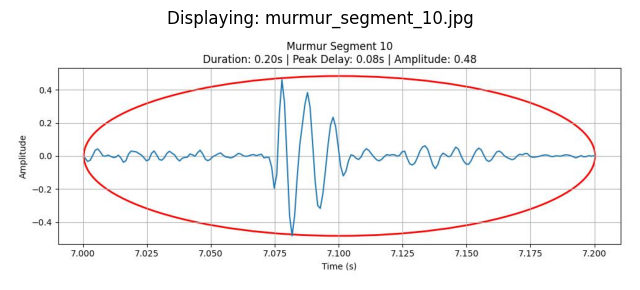

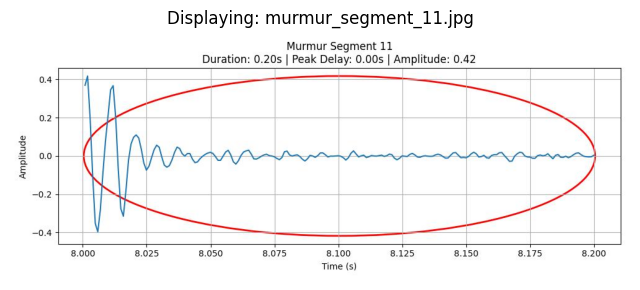

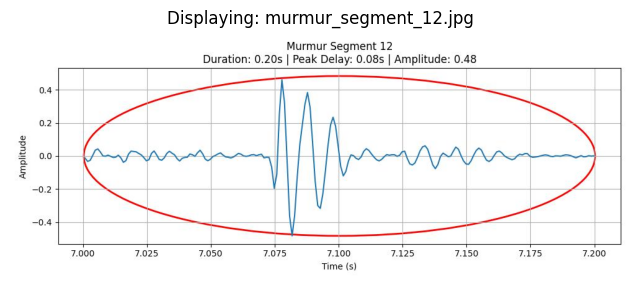

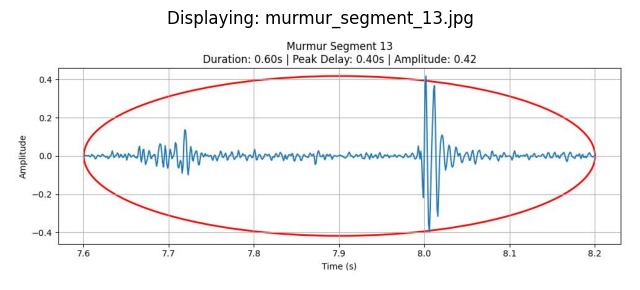

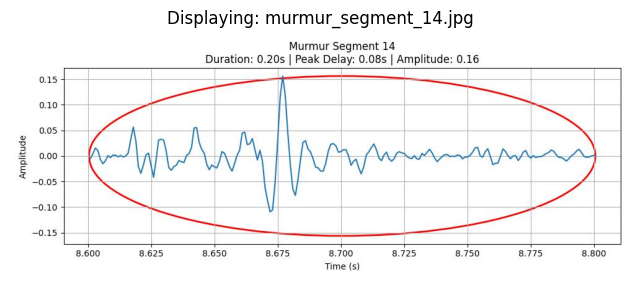

In [32]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import os
import soundfile as sf

# -----------------------------
# Load Signal
# -----------------------------
'''
df = pd.read_csv("/content/drive/MyDrive/TMSL_30_6_25/combined_AORTICSCLEROCIS_signals.csv")
signal = df.iloc[:, 1].values  # Assuming the first column contains the signal
sr = 1000  # Adjust sample rate as needed
'''
FILE = "/content/drive/MyDrive/TMSL_30_6_25/input/set_a/murmur__201101051104.wav"
SR = 1000
signal, sr = librosa.load(FILE, sr=SR)
time = np.linspace(0, len(signal) / sr, len(signal))

# -----------------------------
# Parameters
# -----------------------------
WINDOW_SEC = 0.2
WIN_LEN = int(SR * WINDOW_SEC)
energy = np.array([np.sum(signal[i:i+WIN_LEN]**2) for i in range(0, len(signal)-WIN_LEN, WIN_LEN)])
#threshold = 0.2 * np.mean(energy)
threshold=.2
murmur_idx = np.where(energy > threshold)[0]

# -----------------------------
# Detect Murmur Segments
# -----------------------------
segments = []
if len(murmur_idx) > 0:
    start = murmur_idx[0]
    for i in range(1, len(murmur_idx)):
        if murmur_idx[i] != murmur_idx[i - 1] + 1:
            end = murmur_idx[i - 1]
            segments.append((start, end))
            start = murmur_idx[i]
    segments.append((start, murmur_idx[-1]))

# -----------------------------
# Analyze and Visualize Segments
# -----------------------------
output_folder = "/content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3"
os.makedirs(output_folder, exist_ok=True)

for idx, (start_idx, end_idx) in enumerate(segments):
    start_sample = start_idx * WIN_LEN
    end_sample = (end_idx + 1) * WIN_LEN
    segment = signal[start_sample:end_sample]
    segment_time = time[start_sample:end_sample]

    # Duration AB
    duration_sec = (end_sample - start_sample) / SR

    # Peak delay AC
    peak_pos = np.argmax(np.abs(segment))
    peak_delay = peak_pos / SR

    # Amplitude CD
    amplitude = np.max(np.abs(segment))

    # Plot with Ellipse
    plt.figure(figsize=(10, 4))
    plt.plot(segment_time, segment, label=f"Murmur Segment {idx+1}")
    plt.title(f"Murmur Segment {idx+1}\nDuration: {duration_sec:.2f}s | Peak Delay: {peak_delay:.2f}s | Amplitude: {amplitude:.2f}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Red oval highlighting murmur
    center_time = (segment_time[0] + segment_time[-1]) / 2
    ellipse = Ellipse((center_time, 0), width=duration_sec, height=2 * amplitude,
                      edgecolor='red', facecolor='none', linewidth=2)
    plt.gca().add_patch(ellipse)

    # Save image
    img_path = f"{output_folder}/murmur_segment_{idx+1}.jpg"
    plt.tight_layout()
    plt.savefig(img_path)
    plt.close()

    print(f"Saved {img_path} | Duration: {duration_sec:.2f}s | Peak Delay: {peak_delay:.2f}s | Amplitude: {amplitude:.2f}")

    import os
import matplotlib.pyplot as plt
import cv2

# Set the path to your image folder
FOLDER_PATH = "/content/drive/MyDrive/TMSL_30_6_25/murmur_analysis3/"  # or "images/", or wherever your images are saved

# Supported image extensions
IMAGE_EXTENSIONS = [".png", ".jpg", ".jpeg", ".bmp"]

# Get all image file names in folder
image_files = [f for f in os.listdir(FOLDER_PATH) if os.path.splitext(f)[1].lower() in IMAGE_EXTENSIONS]

# Display each image
for img_file in image_files:
    img_path = os.path.join(FOLDER_PATH, img_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct colors

    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(f"Displaying: {img_file}")
    plt.axis("off")
    plt.show()

Saved: murmur_part_1.wav
Saved: murmur_part_2.wav
Saved: murmur_part_3.wav
Saved: murmur_part_4.wav
Saved: murmur_part_5.wav
Saved: murmur_part_6.wav
Saved: murmur_part_7.wav
Saved: murmur_part_8.wav
Saved: murmur_part_9.wav
Saved: murmur_part_10.wav
Saved: murmur_part_11.wav
Saved: murmur_part_12.wav
Saved: murmur_part_13.wav
Saved: murmur_part_14.wav
Saved: murmur_part_15.wav
CSV with murmur timings saved as: murmur_segments.csv
Waveform with murmur, S1, and S2 highlights saved: waveform_murmur_highlight.png
Murmur center and S1/S2 plot saved: murmur_circle_marks.png


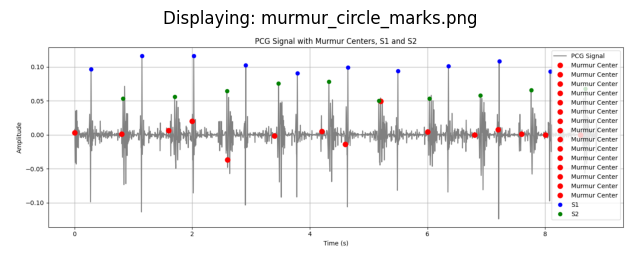

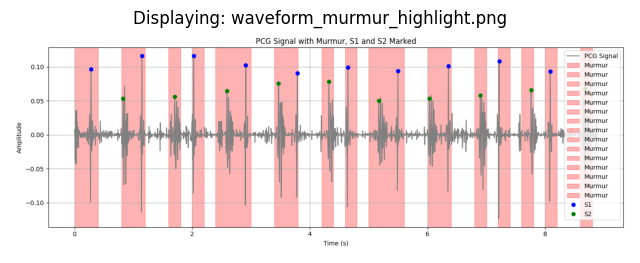

In [33]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, filtfilt, find_peaks
import csv
import os
import matplotlib.pyplot as plt
import cv2


# -----------------------------
# Configuration
# -----------------------------
FILE_PATH = "/content/drive/MyDrive/TMSL_30_6_25/input/set_a/murmur__201101051104.wav"
SR = 1000
WINDOW_SIZE = 0.2
OUTPUT_DIR = "/content/drive/MyDrive/TMSL_30_6_25/murmur_segments12"
PLOT_FILE_1 = "waveform_murmur_highlight.png"
PLOT_FILE_2 = "murmur_circle_marks.png"
CSV_FILE = "murmur_segments.csv"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# -----------------------------
# Helper Functions
# -----------------------------
def bandpass_filter(signal, sr, lowcut=20, highcut=200):
    nyq = 0.5 * sr
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(4, [low, high], btype='band')
    return filtfilt(b, a, signal)

def compute_energy(signal, sr, window_sec):
    window_size = int(sr * window_sec)
    return np.array([
        np.sum(np.square(signal[i:i+window_size]))
        for i in range(0, len(signal) - window_size, window_size)
    ])

# -----------------------------
# Load and Filter Signal
# -----------------------------
signal, _ = librosa.load(FILE_PATH, sr=SR)
filtered_signal = bandpass_filter(signal, SR)
duration = len(filtered_signal) / SR
time = np.linspace(0, duration, len(filtered_signal))

# -----------------------------
# Compute Energy & Threshold
# -----------------------------
energy = compute_energy(filtered_signal, SR, WINDOW_SIZE)
threshold = 0.5 * np.mean(energy)
window_samples = int(SR * WINDOW_SIZE)
indices = np.where(energy > threshold)[0]

# -----------------------------
# Detect and Group Murmur Segments
# -----------------------------
segments = []
if len(indices) > 0:
    start = indices[0]
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            end = indices[i - 1]
            segments.append((start, end))
            start = indices[i]
    segments.append((start, indices[-1]))

# -----------------------------
# Save Segments and CSV
# -----------------------------
csv_rows = [("Segment", "Start (s)", "End (s)")]

for i, (start_idx, end_idx) in enumerate(segments):
    start_sample = start_idx * window_samples
    end_sample = (end_idx + 1) * window_samples
    murmur = filtered_signal[start_sample:end_sample]
    sf.write(f"{OUTPUT_DIR}/murmur_part_{i+1}.wav", murmur, SR)
    print(f"Saved: murmur_part_{i+1}.wav")

    # Add to CSV
    start_t = start_sample / SR
    end_t = end_sample / SR
    csv_rows.append((f"murmur_part_{i+1}", f"{start_t:.2f}", f"{end_t:.2f}"))

# Write CSV
with open(CSV_FILE, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_rows)
print(f"CSV with murmur timings saved as: {CSV_FILE}")

# -----------------------------
# S1 and S2 Detection (Simple Peak Approximation)
# -----------------------------
peaks, _ = find_peaks(filtered_signal, height=np.std(filtered_signal), distance=SR * 0.3)
s1_peaks = peaks[::2]  # simple heuristic: alternate peaks as S1
s2_peaks = peaks[1::2]  # alternate peaks as S2

# -----------------------------
# Plot 1: Highlight Murmur + S1 + S2 Regions on Waveform
# -----------------------------
plt.figure(figsize=(14, 5))
plt.plot(time, filtered_signal, label="PCG Signal", color='gray')

# Highlight murmur regions
for start_idx, end_idx in segments:
    start_t = (start_idx * window_samples) / SR
    end_t = ((end_idx + 1) * window_samples) / SR
    plt.axvspan(start_t, end_t, color='red', alpha=0.3, label='Murmur')

# Mark S1 and S2 peaks
plt.plot(time[s1_peaks], filtered_signal[s1_peaks], 'bo', label='S1')
plt.plot(time[s2_peaks], filtered_signal[s2_peaks], 'go', label='S2')

plt.title("PCG Signal with Murmur, S1 and S2 Marked")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(PLOT_FILE_1)
plt.close()
print(f"Waveform with murmur, S1, and S2 highlights saved: {PLOT_FILE_1}")

# -----------------------------
# Plot 2: Murmur Centers as Red Circles
# -----------------------------
plt.figure(figsize=(14, 5))
plt.plot(time, filtered_signal, label="PCG Signal", color='gray')
for start_idx, end_idx in segments:
    mid_sample = ((start_idx + end_idx) // 2) * window_samples
    plt.plot(time[mid_sample], filtered_signal[mid_sample], 'ro', markersize=8, label='Murmur Center')

plt.plot(time[s1_peaks], filtered_signal[s1_peaks], 'bo', label='S1')
plt.plot(time[s2_peaks], filtered_signal[s2_peaks], 'go', label='S2')

plt.title("PCG Signal with Murmur Centers, S1 and S2")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(PLOT_FILE_2)
plt.close()
print(f"Murmur center and S1/S2 plot saved: {PLOT_FILE_2}")

# Set the path to your image folder
FOLDER_PATH = "./"  # or "images/", or wherever your images are saved

# Supported image extensions
IMAGE_EXTENSIONS = [".png", ".jpg", ".jpeg", ".bmp"]

# Get all image file names in folder
image_files = [f for f in os.listdir(FOLDER_PATH) if os.path.splitext(f)[1].lower() in IMAGE_EXTENSIONS]

# Display each image
for img_file in image_files:
    img_path = os.path.join(FOLDER_PATH, img_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct colors

    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(f"Displaying: {img_file}")
    plt.axis("off")
    plt.show()